# Factors Affecting Sleep Efficiency in 18-30 Year Old Humans
### Introduction:
<br>

#### Motivation:
UBC students don’t often get the best sleep. We want to analyze various factors
affecting sleep efficiency to help UBC students change behaviors to improve their sleep
efficiency. So, our research question is: how is sleep duration, caffeine consumption,
alcohol consumption, smoking status, and exercise frequency related to a 18-30 year
old individual’s sleep efficiency?

#### Dataset:
The data being used is from the Kaggle’s Sleep Efficiency Dataset, found at this link:
https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency. The dataset has beenfiltered to only include subjects 18 to 30 years old inclusive. This dataset is an observational study on a group of test subjects and their daily life
choices related to their sleep patterns.

From this dataset, in order to explore our motivation and research question, the
following variables will be further explored:

> 1. Sleep efficiency (2 digit decimal number from 0.50-0.99, continuous): a measure of the proportion of time in bed spent asleep. Based on the dataset, no person spent less than 50% of their time in bed awake. This is our response variable.

> 2. Sleep duration (hours, continuous): the total amount of time the test subject slept.

> 3. Caffeine consumption (mg, continuous): the amount of caffeine consumed in the 24 hours prior to bedtime.

> 4. Alcohol consumption (oz, continuous): the amount of alcohol consumed in the 24 hours prior to bedtime.

> 5. Smoking status (yes or no, categorical): whether or not the test subject smokes.

> 6. Exercise frequency (number from 0-7, continuous): the number of times the test subject exercises each week.

The data above was chosen because we believed them to be independent without
much collinearity. For example, REM sleep and deep sleep are dependent by
observation since a person can only experience REM sleep if they fall into deep sleep.
Hence, we excluded the following data from the dataset: REM sleep, deep sleep, light
sleep, and awakenings. Also, the bedtime and waking time was not included because
sleep duration was taken instead.

<br><br>


### Importing the necessary libraries

In [ ]:
library(dplyr)
library(ggplot2)
library(leaps)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Analysis:
Initial Analysis on Explanatory Variables:
First, we will do an initial visualization of the explanatory variables on the responding
variable (sleep efficiency) to get a better base understanding of how the explanatory
variables interact with the responding variable.

#### Read the data:

In [ ]:
sleep_data <- read.csv("sleep_efficiency_data.csv")
head(sleep_data)

,ID,Age,Gender,Bedtime,Wakeup.time,Sleep.duration,Sleep.efficiency,REM.sleep.percentage,Deep.sleep.percentage,Light.sleep.percentage,Awakenings,Caffeine.consumption,Alcohol.consumption,Smoking.status,Exercise.frequency
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0,0,0,Yes,3
2,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3,0,3,Yes,3
3,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1,0,0,No,3
4,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3,50,5,Yes,1
5,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3,0,3,No,3
6,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0,NA,0,No,1


#### Filter for desired age group and remove blank fields:


In [ ]:
sleep_data <- filter(sleep_data, Age <=30 & Age >=18)
sleep_data <- na.omit(sleep_data)
head(sleep_data)

,ID,Age,Gender,Bedtime,Wakeup.time,Sleep.duration,Sleep.efficiency,REM.sleep.percentage,Deep.sleep.percentage,Light.sleep.percentage,Awakenings,Caffeine.consumption,Alcohol.consumption,Smoking.status,Exercise.frequency
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,7,27,Female,2021-07-21 21:00:00,2021-07-21 03:00:00,6.0,0.54,28,25,47,2,50,0,Yes,1
2,13,30,Female,2021-08-07 02:30:00,2021-08-07 11:30:00,9.0,0.93,24,58,18,0,50,0,No,1
3,14,28,Male,2021-02-25 01:00:00,2021-02-25 09:30:00,8.5,0.64,28,25,47,4,0,0,No,3
4,17,21,Female,2021-03-24 01:00:00,2021-03-24 08:00:00,7.0,0.54,28,22,50,4,0,2,Yes,0
5,23,29,Female,2021-12-23 22:00:00,2021-12-23 06:00:00,8.0,0.84,23,60,17,2,75,0,No,2
6,29,23,Male,2021-11-08 21:30:00,2021-11-08 06:30:00,9.0,0.65,27,20,53,3,0,0,No,3


#### Factorize smoking status:


In [ ]:
sleep_data$Smoking.status<-as.factor(sleep_data$Smoking.status)


#### Creating plots for initial analysis:

##### Boxplot for sleep efficiency by smoking status:

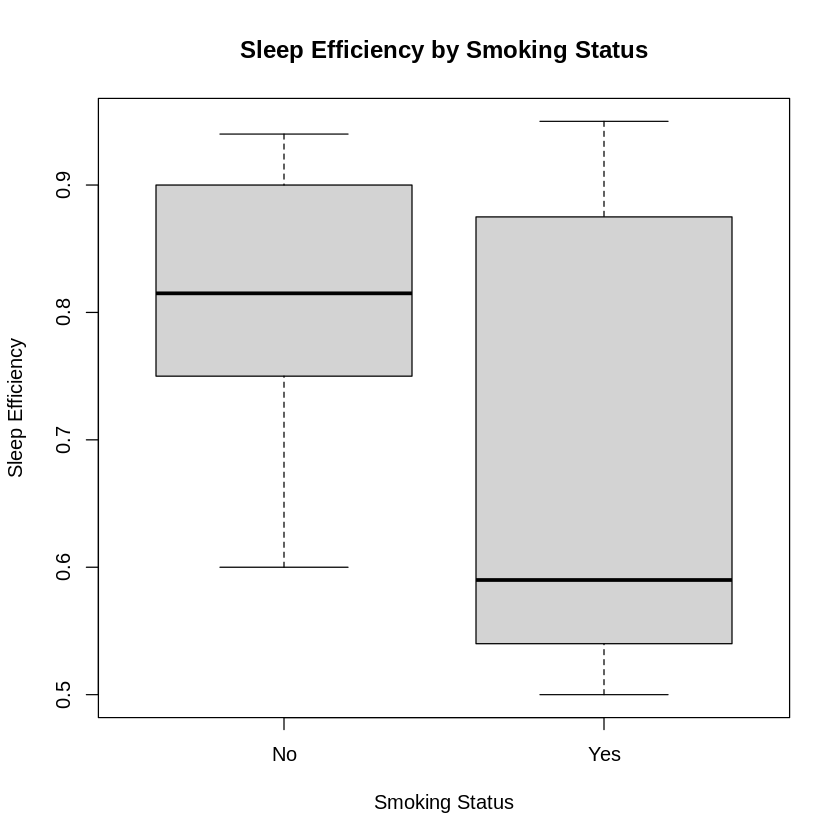

In [ ]:
boxplot(Sleep.efficiency ~ Smoking.status, data = sleep_data,
        xlab = "Smoking Status", ylab = "Sleep Efficiency",
        main = "Sleep Efficiency by Smoking Status")

We can see that the median sleep efficiency for non-smokers is significantly higher than
smokers. Also, the interquartile range (IQR) and overall range for smokers is also much
higher than non-smokers. This suggests that non-smokers normally have higher sleep
efficiency, and also have less variance in their sleep efficiency too.

##### Scatterplot for sleep efficiency by Exercise frequency :

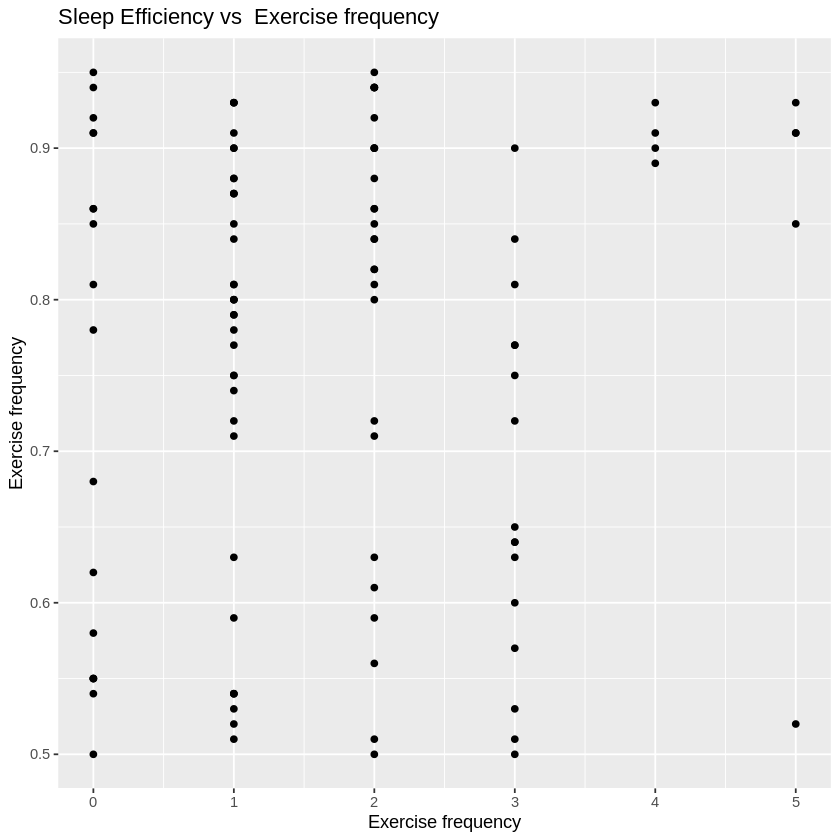

In [ ]:
ggplot(sleep_data, aes(x = Exercise.frequency, y = Sleep.efficiency)) +
  geom_point() +
  labs(x = "Exercise frequency", y = "Exercise frequency",
       title = "Sleep Efficiency vs  Exercise frequency")


We see that for when exercise frequency is from 0-3 there does not seem to be a big
difference in sleep efficiency, and there is also a lot of variation. When exercise
frequency is 4 or 5, it appears as though there is a lot less variation, and also the sleep
efficiency is consistently higher. However, it should be noted that this could largely be
due to there being much less data for when exercise frequency is 4 or 5

##### Scatterplot for sleep efficiency by Caffeine consumption:

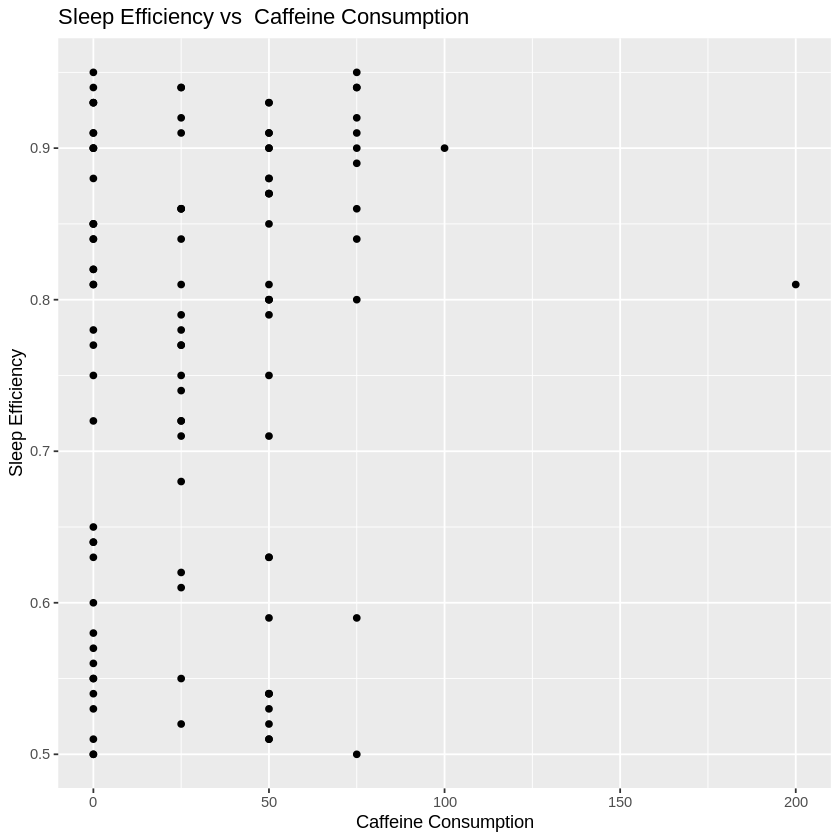

In [ ]:
ggplot(sleep_data, aes(x = Caffeine.consumption, y = Sleep.efficiency)) +
  geom_point() +
  labs(x = "Caffeine Consumption", y = "Sleep Efficiency",
       title = "Sleep Efficiency vs  Caffeine Consumption")


##### Scatterplot for sleep efficiency by Alcohol consumption :

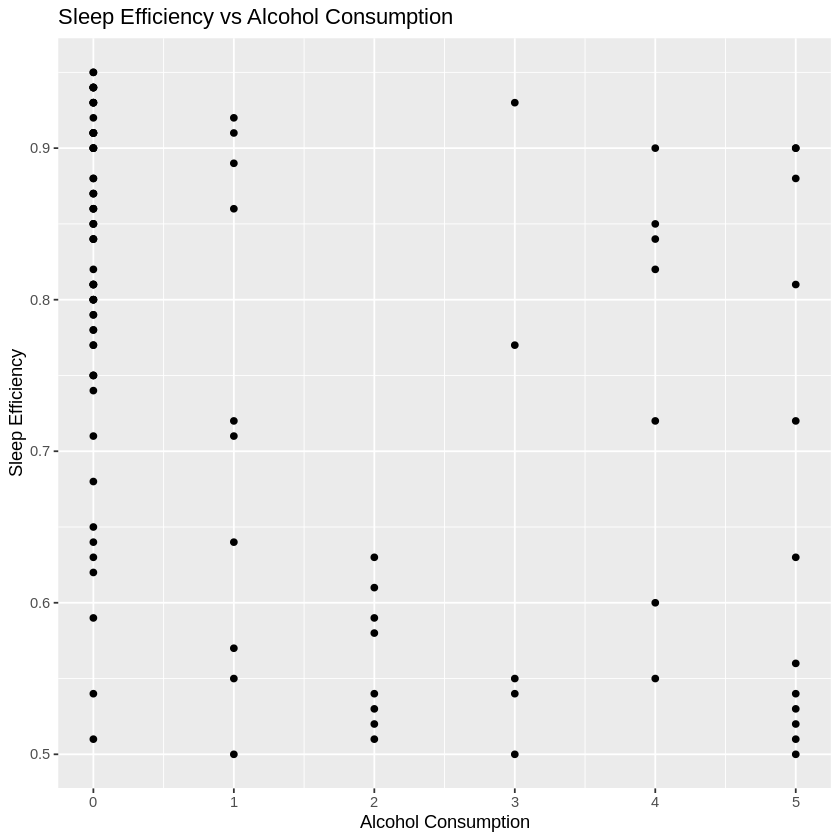

In [ ]:
ggplot(sleep_data, aes(x = Alcohol.consumption, y = Sleep.efficiency)) +
  geom_point() +
  labs(x = "Alcohol Consumption", y = "Sleep Efficiency",
       title = "Sleep Efficiency vs Alcohol Consumption")

##### Scatterplot for sleep efficiency by Sleep duration :

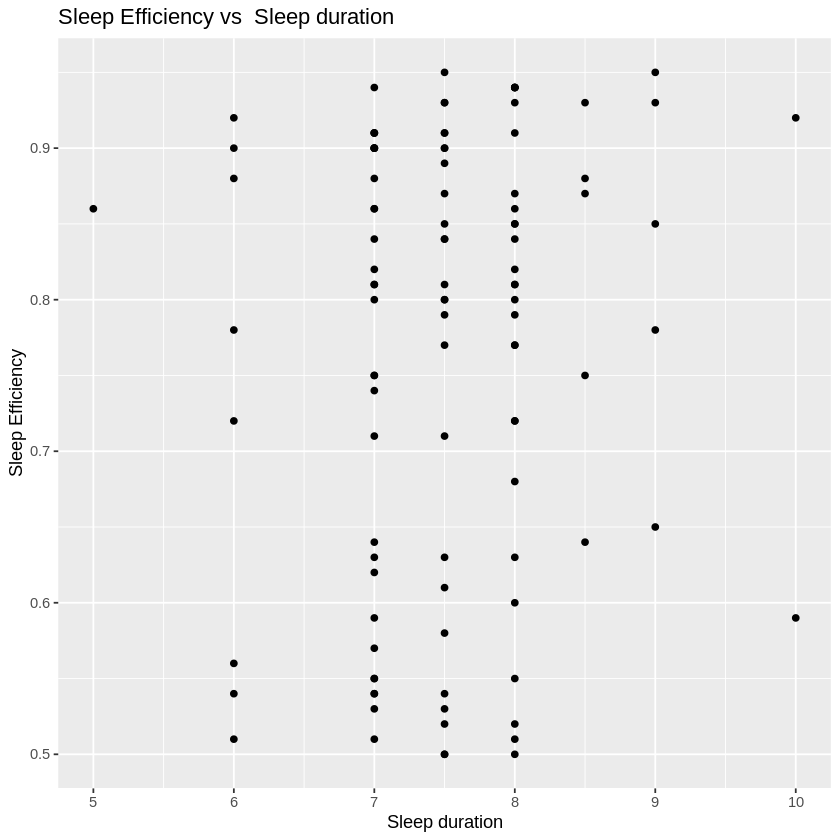

In [ ]:
ggplot(sleep_data, aes(x = Sleep.duration, y = Sleep.efficiency)) +
  geom_point() +
  labs(x = "Sleep duration", y = "Sleep Efficiency",
       title = "Sleep Efficiency vs  Sleep duration")

Through figures 3, 4, and 5 we see that there are no clear patterns or correlations for
any of the explanatory variables, caffeine consumption, alcohol consumption, or sleep
duration with the responding variable, sleep efficiency. This suggests that these
explanatory variables may not have a large impact on sleep efficiency, as there are no
clear relationships in these figures.

<br><br>

### Creating a Linear Model:


Next, we will find the best linear model we can for the explanatory variables and the
responding variable.
In order to find the optimal number of explanatory variables to include in our model, we
can use regsubsets and then find the adjusted R^2 values when a different number of
optimal explanatory variables are used:

#### Creating the full model

In [ ]:
full_model<-lm(Sleep.efficiency~Sleep.duration+Caffeine.consumption+Alcohol.consumption+Smoking.status+Exercise.frequency, data = sleep_data)
summary(full_model)


Call:
lm(formula = Sleep.efficiency ~ Sleep.duration + Caffeine.consumption + 
    Alcohol.consumption + Smoking.status + Exercise.frequency, 
    data = sleep_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.240531 -0.092109  0.002833  0.102833  0.295796 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.7889146  0.1300172   6.068 2.39e-08 ***
Sleep.duration        0.0022815  0.0162430   0.140  0.88858    
Caffeine.consumption  0.0003285  0.0004317   0.761  0.44848    
Alcohol.consumption  -0.0270667  0.0080226  -3.374  0.00106 ** 
Smoking.statusYes    -0.0797834  0.0276804  -2.882  0.00484 ** 
Exercise.frequency    0.0083589  0.0101719   0.822  0.41319    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.129 on 99 degrees of freedom
Multiple R-squared:  0.2517,	Adjusted R-squared:  0.2139 
F-statistic: 6.659 on 5 and 99 DF,  p-value: 2.193e-05


#### using regsubsets to find optimal model:

In [ ]:
s<-regsubsets(Sleep.efficiency~Exercise.frequency + Sleep.duration + Caffeine.consumption + Alcohol.consumption + Smoking.status, data = sleep_data, method="exhaustive")
ss<-summary(s)
cat("Adjusted R2: " , ss$adjr2, "\n")
cat("Mallows's Cp: " , ss$cp)

Adjusted R2:  0.1629137 0.2273731 0.2249049 0.2215853 0.2138791 
Mallows's Cp:  8.67765 1.249147 2.583417 4.019729 6

From here, we see that using 2 variables produces the highest adjusted R^2 value and
also the lowest cp value, so it is the most optimal. Although one thing to note is the
adjusted R^2 value is still only ~ 0.23, however this is still okay because this study is
trying to explain human behavior, which has a lot of unexplainable variation and causes
the R^2 value to be lower (usually less than 0.5).

Next, we can use the exhaustive regsubsets method to find which 2 explanatory
variables to include in our model:

In [ ]:
ss$which


,(Intercept),Exercise.frequency,Sleep.duration,Caffeine.consumption,Alcohol.consumption,Smoking.statusYes
1,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE
2,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE
3,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE
4,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
5,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


So, we see that the 2 statistically most important explanatory variables are: alcohol
consumption and smoking status, and the intercept is also statistically important.

Now, we can create an optimal model using the most important explanatory variables discovered above.

In [ ]:
opt_model <- lm(Sleep.efficiency~Alcohol.consumption + Smoking.status, data = sleep_data)
summary(opt_model)


Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption + Smoking.status, 
    data = sleep_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.241386 -0.100197  0.007854  0.106091  0.289803 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.83215    0.01743  47.736  < 2e-16 ***
Alcohol.consumption -0.02824    0.00712  -3.966 0.000136 ***
Smoking.statusYes   -0.08076    0.02608  -3.097 0.002523 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1279 on 102 degrees of freedom
Multiple R-squared:  0.2422,	Adjusted R-squared:  0.2274 
F-statistic:  16.3 on 2 and 102 DF,  p-value: 7.184e-07


The optimal model has a slightly higher adjusted R^2, lower residual standard error, and
also all of the p values for the explanatory variables in the optimal model are significant
(at < 0.01), whereas the p values for sleep duration, caffeine consumption, and exercise
frequency are all > 0.4 in the full model. Additionally, the intercept has a lower p value
too in the optimal model. All of this suggests that the optimal model created is a better fit
for the data, and the full model contains variables that are not statistically important.

Furthermore, the optimal model we have found is:

<br>

**y = 0.83215 - 0.02824x<sub>1</sub> - 0.08076x<sub>2</sub>**

<br>
Where y is the predicted sleep efficiency, x<sub>1</sub> is alcohol consumption in oz and x<sub>2</sub> is 1 if the person smokes and 0 if the person does not smoke.

This model has an adjusted R^2 of 0.2274 and a residual standard error of 0.1279.



<br><br>

### Conclusion:


From the analysis of the dataset, out of all of the explanatory variables analyzed (smoking status, exercise frequency, caffeine consumption, alcohol consumption, and sleep duration), the best explainers for sleep efficiency for 18-30 year olds are: alcohol consumption and whether the person smokes or not. Both of these have a negative correlation with sleep efficiency, as found in the final optimal model:

<br>

**y = 0.83215 - 0.02824x<sub>1</sub> - 0.08076x<sub>2</sub>**

<br>
where y is the predicted sleep efficiency, x<sub>1</sub> is alcohol consumption in oz and x<sub>2</sub> is 1 if the person smokes and 0 if the person does not smoke.

<br>
<br>

This means that a person who consumes more alcohol and/or smokes will have poorer sleep efficiency. Thus, people between 18-30 years old should try to avoid alcohol and smoking. This intuitively makes sense, as it is known that alcohol and smoking has many damaging effects on the body, one of those being on your sleep.

However, one important comment of interest is that the optimal model had a relatively low adjusted R^2 of only 0.2274. Even though this is to be expected with human behavioral models, since human behavior is unpredictable and influenced by many factors, such that the adjusted R^2 will generally be <0.5. This may still suggest that the optimal model is not a great fit and there are other factors affecting sleep efficiency.

Another important comment of interest is that the optimal model says that exercise frequency, caffeine consumption, and sleep duration is not statistically important to sleep efficiency. However, this might be because for these explanatory variables, there were not a lot of data points in the extreme ends. For example, there is only 1 point for caffeine consumption > 100mg, few points for exercise frequency > 3 per week, and most sleep duration data points were between 6-9 hours. Thus, these few data points may not be explaining the response compared to a larger data set with values in more extreme ranges.

In conclusion, as UBC students tend to be between 18-30 years old, based on the results of the study, we recommend UBC students reduce their alcohol consumption and quit smoking to get a better sleep efficiency.
